In [546]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [547]:
data = pd.read_csv('train.csv')

In [548]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [550]:
data.drop(['Name', 'Ticket','Cabin'], inplace=True, axis=1)

In [551]:
data.set_index(['PassengerId'], drop=True, inplace=True)

In [552]:
my_dict = {'male':0, 'female':1}
data['Sex_num'] = data['Sex'].map(my_dict)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0
2,1,1,female,38.0,1,0,71.2833,C,1
3,1,3,female,26.0,0,0,7.9250,S,1
4,1,1,female,35.0,1,0,53.1000,S,1
5,0,3,male,35.0,0,0,8.0500,S,0


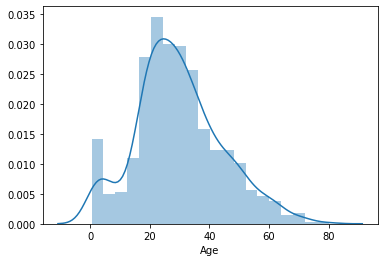

In [553]:
fig, ax = plt.subplots()
_ = sns.distplot(data['Age'])

In [554]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [555]:
gender_df = data.groupby(['Sex']).agg({'Sex':np.size})
gender_df

,Sex
Sex,
female,314
male,577


In [556]:
gender_df.columns = ['count']

In [557]:
gender_df

,count
Sex,
female,314
male,577


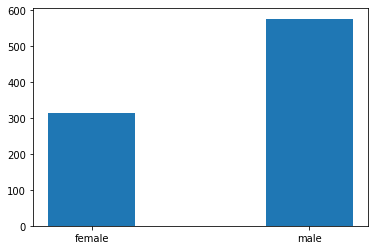

In [558]:
fig, ax = plt.subplots()
gender = gender_df.index
count = gender_df['count']
ax.bar(gender, count, width=0.4)
plt.show()

In [559]:
# survival ratio in male and female
sur_df = pd.DataFrame(data.groupby(['Sex']).agg({'Survived': lambda x: np.size(x==1)*np.mean(x==1)}).unstack())
dead_df=pd.DataFrame(data.groupby(['Sex']).agg({'Survived': lambda x: np.size(x==0)*np.mean(x==0)}).unstack())

In [560]:
dead_df = dead_df.T
dead_df.columns = ['female','male']
dead_df

,female,male
0,81,468


In [561]:
sur_df = sur_df.T
sur_df.columns = ['female','male']
sur_df

,female,male
0,233.0,109.0


In [562]:
sur_df=sur_df.T
dead_df=dead_df.T

In [563]:
sur_df[0]

female    233.0
male      109.0
Name: 0, dtype: float64

In [564]:
dead_df[0]

female     81
male      468
Name: 0, dtype: int64

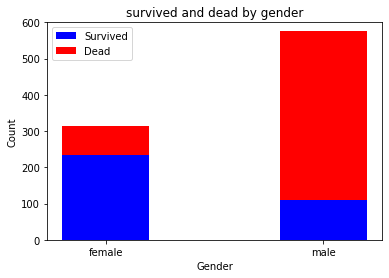

In [565]:
# survival visual in male and female
label = ['female', 'male']
sur = list(sur_df[0])
dead = list(dead_df[0])
fig = plt.figure()
ax  = fig.gca()
ax.bar(label, sur,width=0.4 , color='b')
ax.bar(label, dead, width=0.4, color='r',bottom=sur)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('survived and dead by gender')
ax.set_xticks(label, ('female', 'male'))
ax.legend(labels=['Survived', 'Dead'])
ax.set_ylim([0,600])
plt.show()

In [566]:
class_df = pd.DataFrame(data.groupby(['Pclass']).agg({'Survived': lambda x: np.size(x==1)*np.mean(x==1)}).unstack())
class_df = (class_df.T)
class_df.columns = [1,2,3]
class_df_sur = class_df.T
class_df_sur

,0
1,136
2,87
3,119


In [567]:
class_df = pd.DataFrame(data.groupby(['Pclass']).agg({'Survived': lambda x: np.size(x==0)*np.mean(x==0)}).unstack())
class_df = (class_df.T)
class_df.columns = [1,2,3]
class_df_dead = class_df.T
class_df_dead

,0
1,80
2,97
3,372


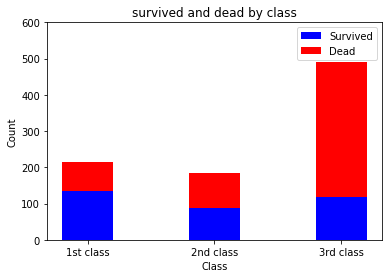

In [568]:
# survival visual by ticket class
label = ['1st class', '2nd class', '3rd class']
sur = list(class_df_sur[0])
dead = list(class_df_dead[0])
fig = plt.figure()
ax  = fig.gca()
ax.bar(label, sur,width=0.4 , color='b')
ax.bar(label, dead, width=0.4, color='r',bottom=sur)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('survived and dead by class')
ax.legend(labels=['Survived', 'Dead'])
ax.set_ylim([0,600])
plt.show()

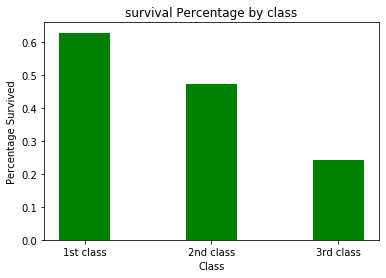

In [569]:
# percentage survived barplot
# survival visual by ticket class
label = ['1st class', '2nd class', '3rd class']
sur = list(class_df_sur[0])
dead = list(class_df_dead[0])
total = np.array(sur)+np.array(dead)
percentage = np.array(sur)/total
fig = plt.figure()
ax  = fig.gca()
ax.bar(label, percentage,width=0.4 , color='g')
#ax.bar(label, dead, width=0.4, color='r',bottom=sur)
ax.set_xlabel('Class')
ax.set_ylabel('Percentage Survived')
ax.set_title('survival Percentage by class')
plt.show()

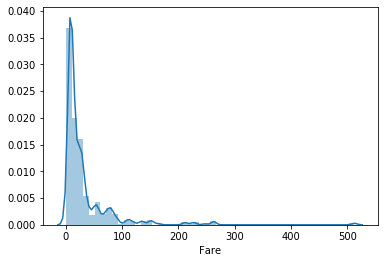

In [570]:
sns.distplot(data['Fare'])

In [571]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [572]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_num
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0
2,1,1,female,38.0,1,0,71.2833,C,1
3,1,3,female,26.0,0,0,7.9250,S,1
4,1,1,female,35.0,1,0,53.1000,S,1
5,0,3,male,35.0,0,0,8.0500,S,0


In [573]:
# checking distribution of age is normal or not

st.shapiro(data['Age'].dropna())

(0.9814548492431641, 7.322165629375377e-08)

In [574]:
import pingouin as pg

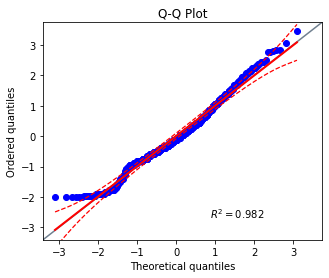

In [575]:
_ = pg.qqplot(data['Age'].dropna())

In [576]:
data['Sex_num'].corr(data['Fare'])

0.18233283380286996

In [577]:
st.pointbiserialr(data['Sex_num'], data['Fare'])

PointbiserialrResult(correlation=0.18233283380287005, pvalue=4.230867870038731e-08)

In [578]:
st.pointbiserialr(data['Pclass'], data['Fare'])

PointbiserialrResult(correlation=-0.5494996199439077, pvalue=1.9673861734207248e-71)

In [579]:
st.pointbiserialr(data['Pclass'], data['Survived'])

PointbiserialrResult(correlation=-0.33848103596101525, pvalue=2.537047387978631e-25)

In [580]:
data_age = data[data["Age"].isna()==False]

In [581]:
st.pointbiserialr(data_age['Age'], data_age['Survived'])

PointbiserialrResult(correlation=-0.07722109457217766, pvalue=0.039124654013465966)

Almost no correlation , can be seen through graph too

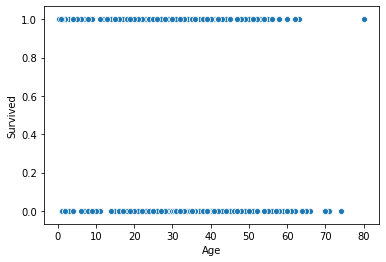

In [582]:
sns.scatterplot(data_age['Age'], data_age['Survived'])

(0, 550)

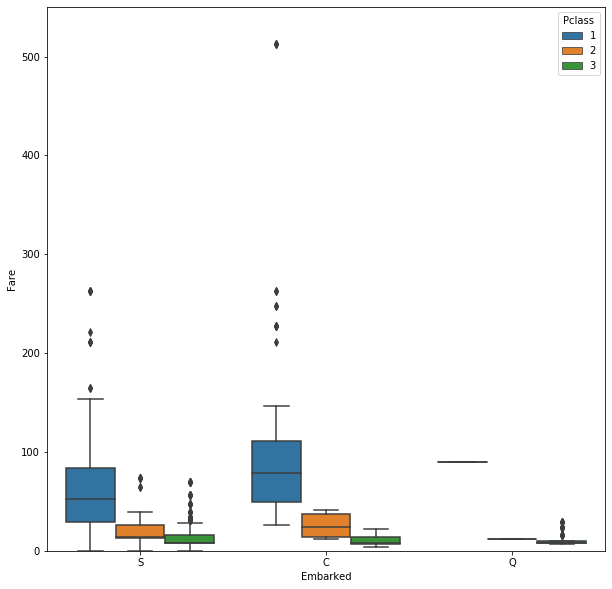

In [583]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Embarked', y='Fare',data=data,hue='Pclass')
ax = plt.gca()
ax.set_ylim([0,550])

#### now some kernel density plots

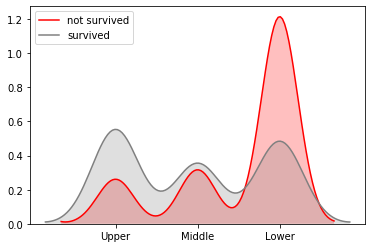

In [584]:
fig, ax = plt.subplots()
ax=sns.kdeplot(data['Pclass'][data['Survived'] == 0], 
               color='red',
               shade=True,
               label='not survived')
ax=sns.kdeplot(data['Pclass'][data['Survived'] == 1] , 
               color='gray',
               shade=True,
               label='survived')
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(data['Pclass'].unique()), labels);

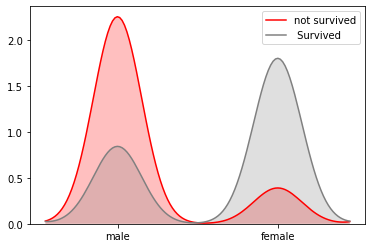

In [585]:
fig, ax = plt.subplots()
_=ax = sns.kdeplot(data['Sex_num'][data['Survived']==0], color='red', shade=True, label='not survived',bw=0.15)
_=ax = sns.kdeplot(data['Sex_num'][data['Survived']==1], color='gray', shade=True, label=' Survived',bw=0.15)
labels=['male', 'female']
_=plt.xticks(sorted(data['Sex_num'].unique()), labels)

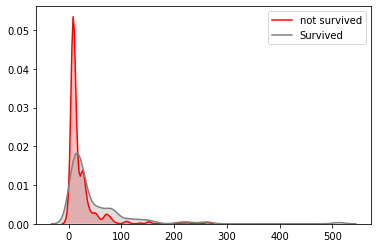

In [586]:
fig, ax = plt.subplots()
ax = sns.kdeplot(data['Fare'][data['Survived']==0],color='red',shade=True,label='not survived')

ax = sns.kdeplot(data['Fare'][data['Survived']==1],
                 color='grey',
                 shade=True,
                 label='Survived')



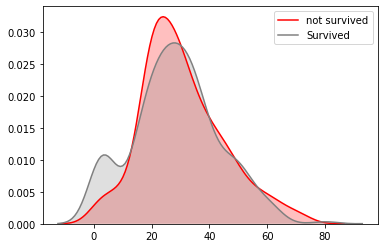

In [587]:
fig, ax = plt.subplots()
ax = sns.kdeplot(data['Age'][data['Survived']==0],color='red',shade=True,label='not survived')

ax = sns.kdeplot(data['Age'][data['Survived']==1],
                 color='grey',
                 shade=True,
                 label='Survived')

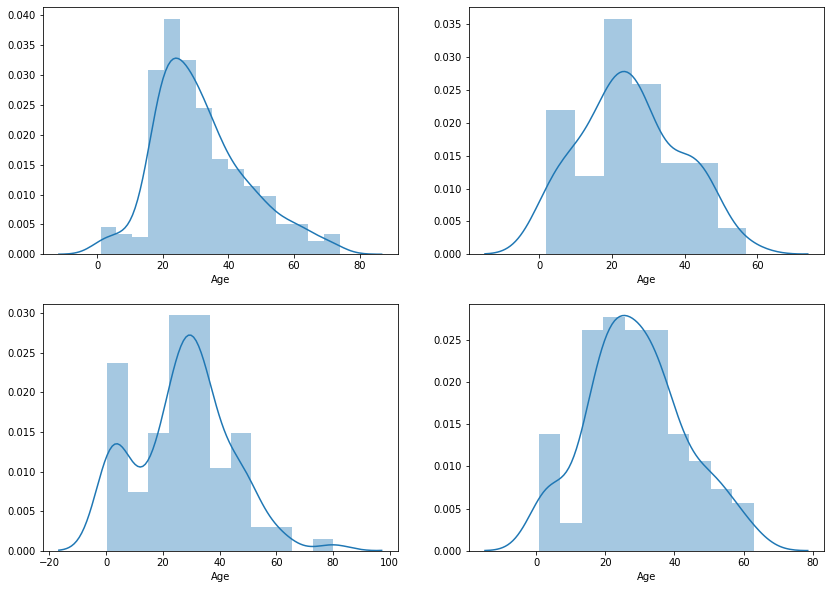

In [588]:
plt.figure(figsize=(14,10))
plt.subplot(221)
_ =sns.distplot(data['Age'][data['Survived']==0][data['Sex']=='male'])
ax1 = plt.gca()
plt.subplot(222)
_ =sns.distplot(data['Age'][data['Survived']==0][data['Sex']=='female'])
plt.subplot(223)
_ =sns.distplot(data['Age'][data['Survived']==1][data['Sex']=='male'])
plt.subplot(224)
_ =sns.distplot(data['Age'][data['Survived']==1][data['Sex']=='female'])

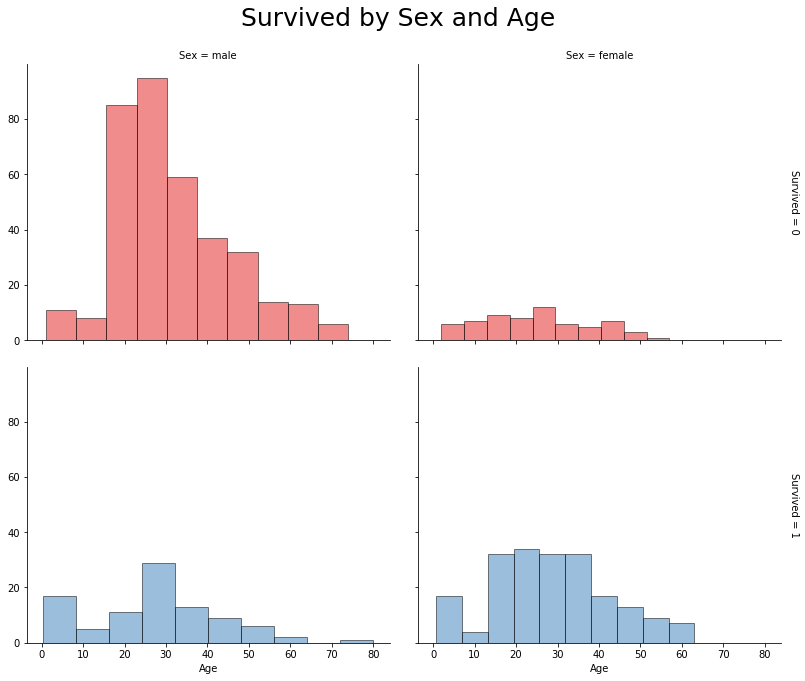

In [589]:
g=sns.FacetGrid(data, col='Sex', row='Survived', margin_titles=True,hue='Survived', palette="Set1")
g = g.map(plt.hist, "Age",ec='black',alpha=0.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

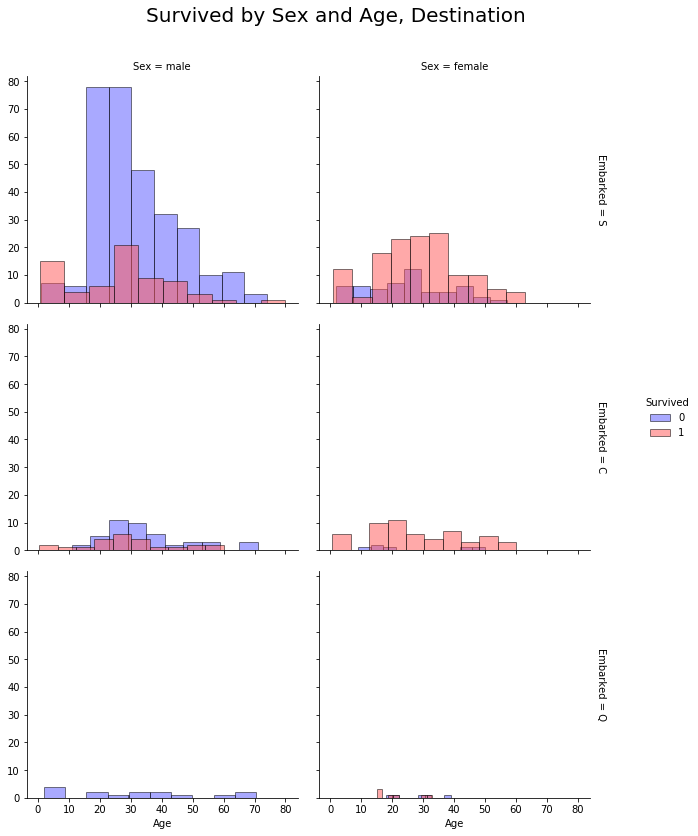

In [590]:
g=sns.FacetGrid(data, col='Sex', row='Embarked', margin_titles=True,hue='Survived', palette="seismic")
g = g.map(plt.hist, "Age",ec='black',alpha=0.5).add_legend()
g.fig.set_figwidth(10)
g.fig.set_figheight(12)
g.fig.suptitle("Survived by Sex and Age, Destination", size = 20)
plt.subplots_adjust(top=0.90)

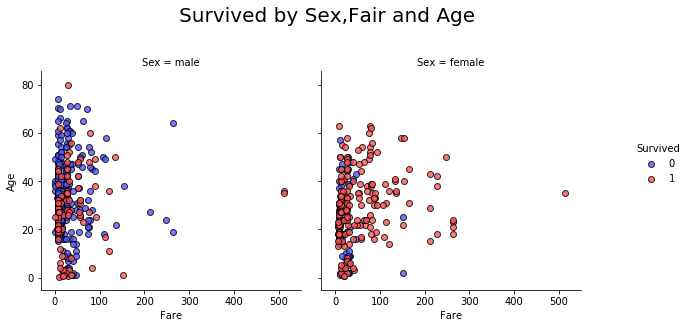

In [591]:
g=sns.FacetGrid(data, col='Sex', margin_titles=True,hue='Survived', palette="seismic")
g = g.map(plt.scatter, "Fare","Age",ec='black',alpha=0.8).add_legend()
g.fig.set_figwidth(10)
g.fig.set_figheight(5)
g.fig.suptitle("Survived by Sex,Fair and Age", size = 20)
plt.subplots_adjust(top=0.80)

In [592]:
#sns.catplot(x='Fare', y="Age", data=data, hue='Survived',col='Sex')

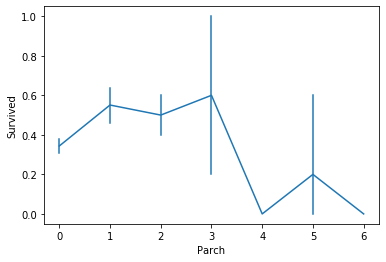

In [593]:
_= sns.lineplot(x='Parch', y='Survived', data=data,err_style="bars")

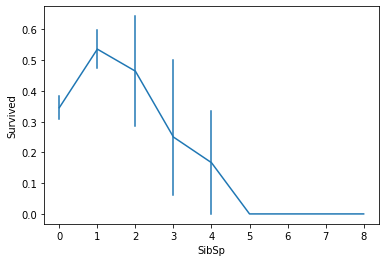

In [594]:
_= sns.lineplot(x='SibSp', y='Survived', data=data,err_style="bars")

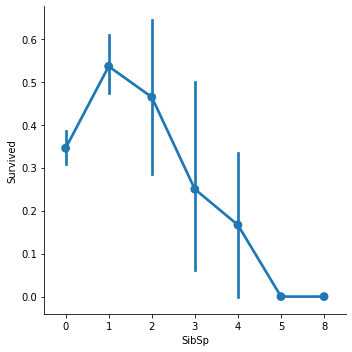

In [595]:
_= sns.catplot(x='SibSp', y='Survived', data=data,kind='point')

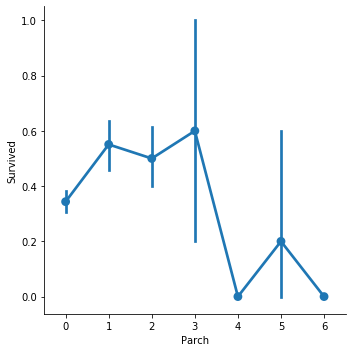

In [596]:
_= sns.catplot(x='Parch', y='Survived', data=data,kind='point')

In [597]:
corr= data.corr()

In [598]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

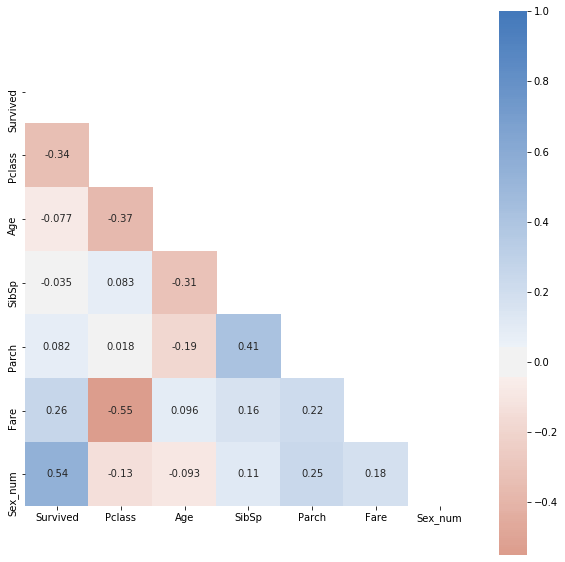

In [599]:
plt.figure(figsize=(10,10))
_=sns.heatmap(corr,cmap=sns.diverging_palette(20,250, n=250),square=True,mask=mask,annot=True,center=0)